In [1]:
import numpy as np

from math import cos,sin,radians,acos,asin,degrees,pi,sqrt
from py_pol.stokes import Stokes
from py_pol.utils import degrees
from py_pol.drawings import draw_poincare,draw_stokes_points,draw_empty_sphere
from scipy.spatial.transform import Rotation as R


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter

import random

import warnings
warnings.filterwarnings("ignore")

Axis equal not supported by your current version of Matplotlib


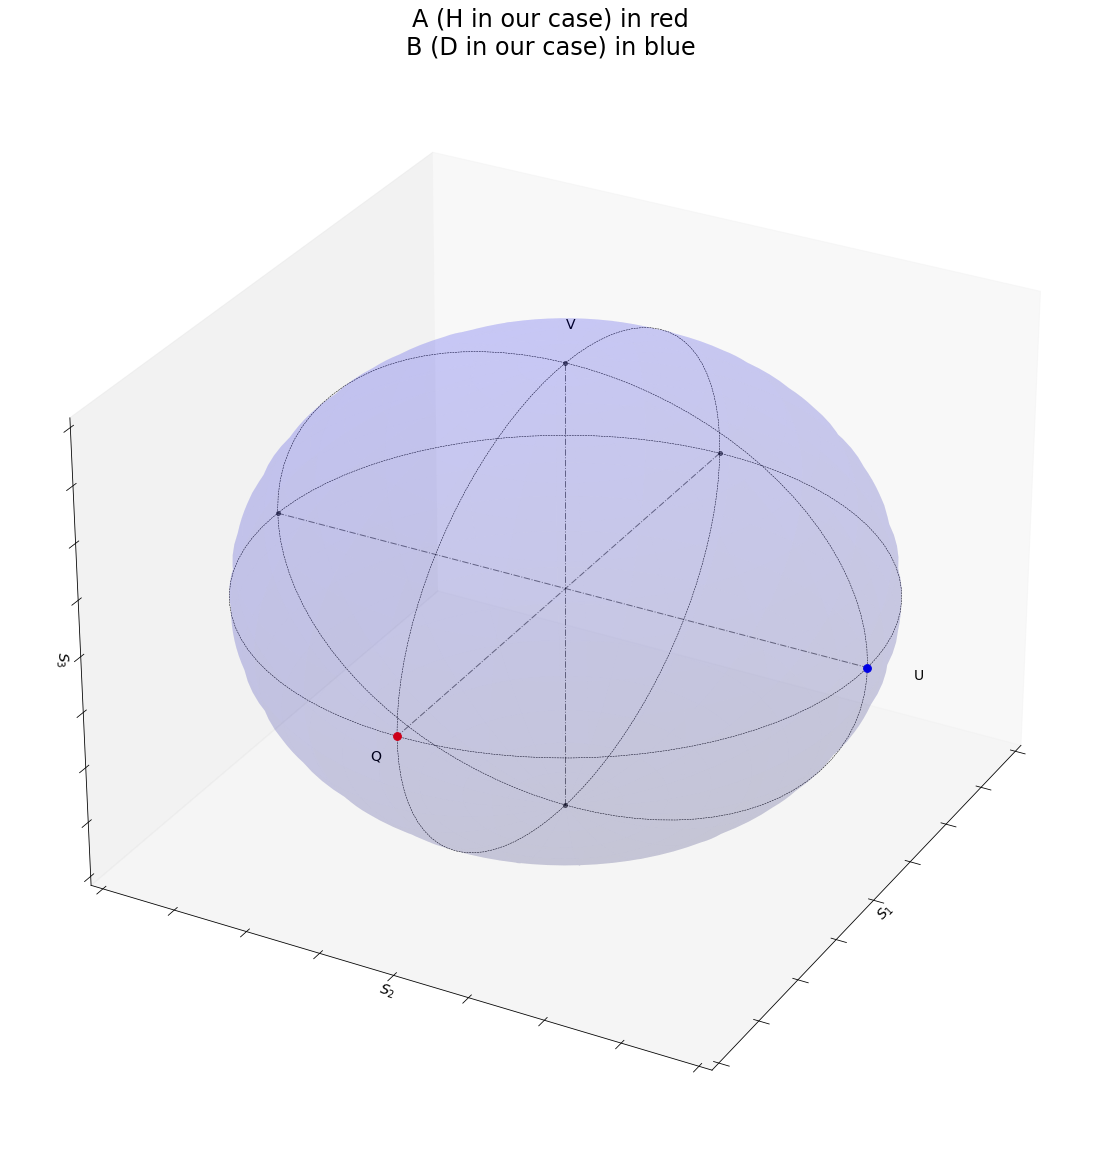

In [2]:
#Define desired polarization points


#H
stokesA = Stokes("A")
stokesA.from_components((1,1,0,0))

#D
stokesB = Stokes("B")
stokesB.from_components((1,0,1,0))




#Plot H and D
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')

draw_empty_sphere(ax,[0.5,0.5])
draw_stokes_points(ax,stokesA,color_scatter='r')
draw_stokes_points(ax,stokesB,color_scatter='b')
plt.title("A (H in our case) in red\nB (D in our case) in blue",fontsize=24)


componentsA=stokesA.parameters.components()[1:]
componentsB=stokesB.parameters.components()[1:]

Axis equal not supported by your current version of Matplotlib
Dot product =  2.7755575615628914e-17
len A' =  1.0
len B' =  1.0


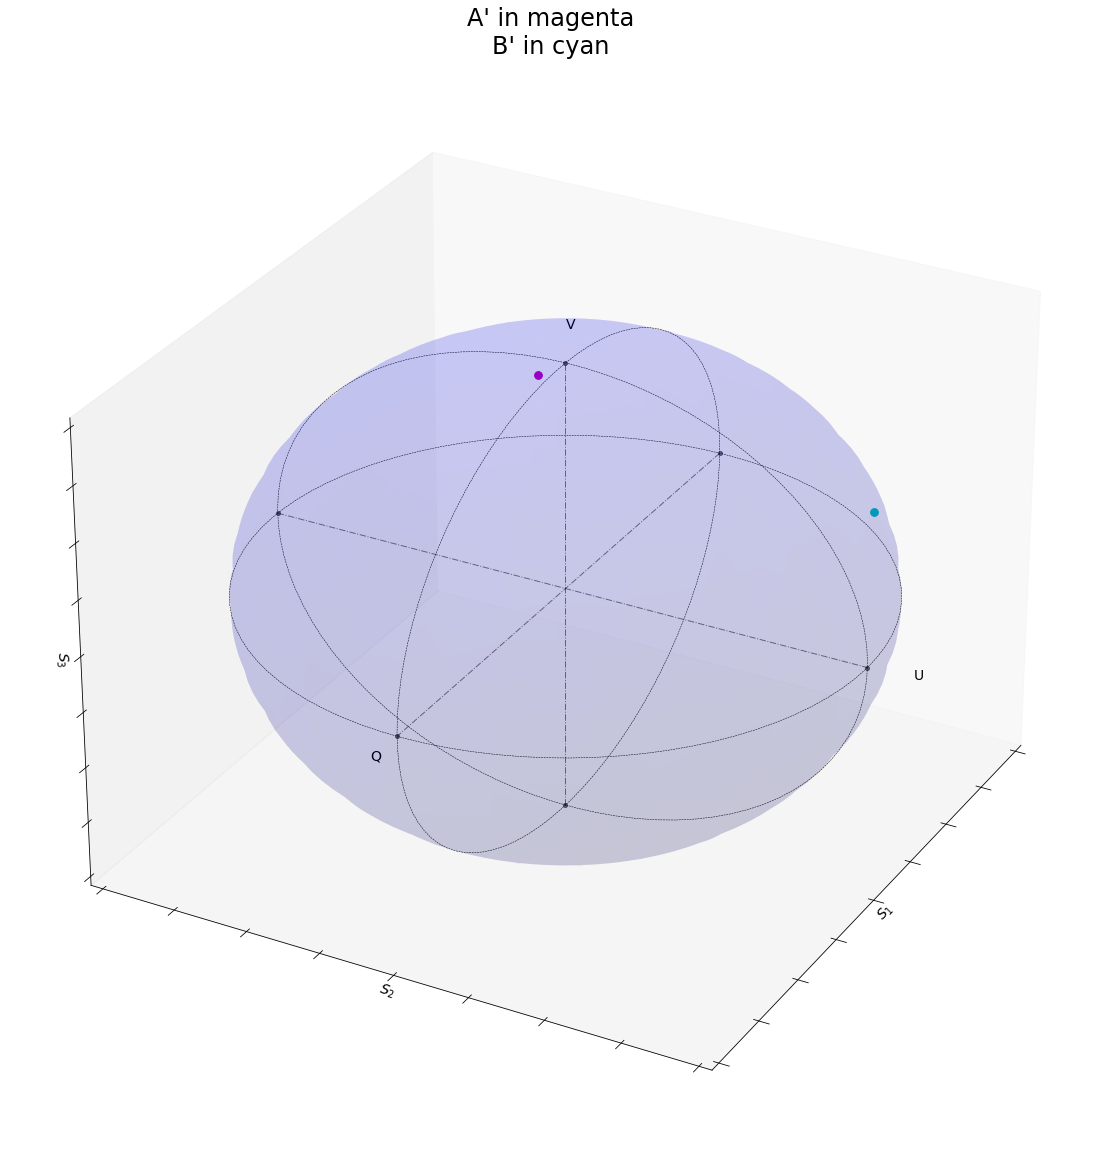

In [3]:
#Create 2 random points 90 degrees apart (A' and B')

#Find 2 random angles defining spherical coordinates
two_phi=random.uniform(-pi/2,pi/2)
two_chi=random.uniform(0,2*pi)

#Find stokes components
s1=cos(two_chi)*cos(two_phi)
s2=sin(two_chi)*cos(two_phi)
s3=sin(two_phi)

#Define A' Stokes object
stokesA_prime=Stokes("A'")
stokesA_prime.from_components((sqrt(s1**2+s2**2+s3**2),s1,s2,s3)).normalize()


#Define B' as orthagonal to A'
stokesB_prime=Stokes("B'")
stokesB_prime.from_components((sqrt((s2-s3)**2+(s3-s1)**2+(s1-s2)**2),s2-s3,s3-s1,s1-s2)).normalize()




#Plot A' and B'
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
draw_stokes_points(ax,stokesA_prime,color_scatter='m')
draw_stokes_points(ax,stokesB_prime,color_scatter='c')
plt.title("A' in magenta\nB' in cyan",fontsize=24)


#Get stokes components A' and B'
componentsA_prime=stokesA_prime.parameters.components()[1:]
componentsB_prime=stokesB_prime.parameters.components()[1:]



print('Dot product = ',np.dot(componentsA_prime,componentsB_prime))
print("len A' = ",sqrt(componentsA_prime[0]**2+componentsA_prime[1]**2+componentsA_prime[2]**2))
print("len B' = ",sqrt(componentsB_prime[0]**2+componentsB_prime[1]**2+componentsB_prime[2]**2))







Axis equal not supported by your current version of Matplotlib


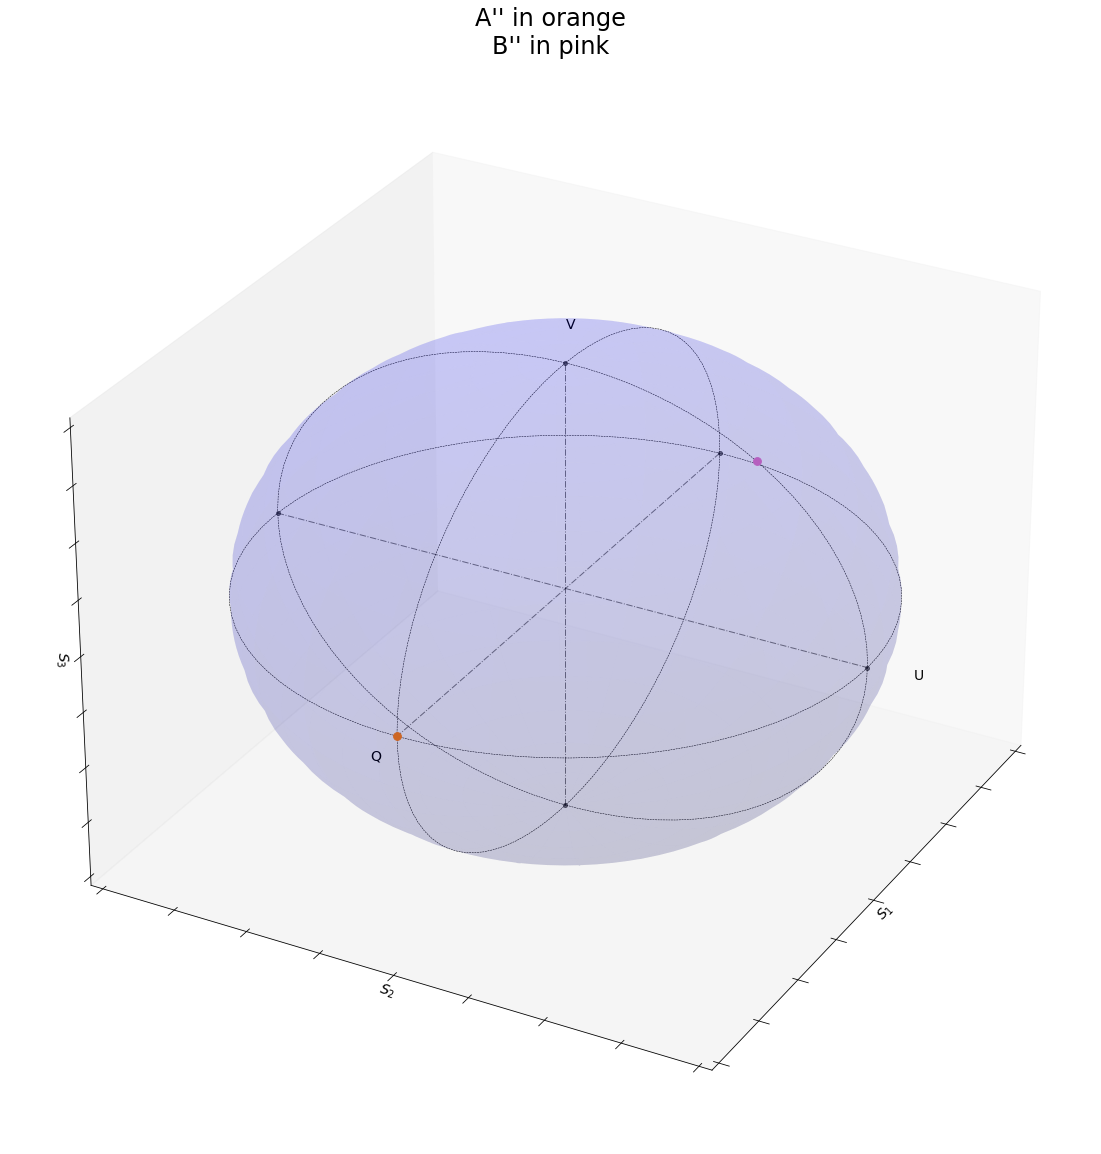

In [4]:
# STEP 1: find a rotation that would put A' into A and apply it to A' and B'.
#         this will give us A'' and B''



# To put A' into A, find rotation angle (dot product) and rotation axis (cross product)

rotation_angle=acos(np.dot(componentsA_prime,componentsA))/pi*180

axis=np.cross(componentsA_prime,componentsA)
axis=axis/np.linalg.norm(axis)


rotation1=R.from_rotvec(axis*radians(rotation_angle))

componentsA_primeprime=rotation1.apply(componentsA_prime)
componentsB_primeprime=rotation1.apply(componentsB_prime)

stokesA_primeprime=Stokes("A''")
stokesB_primeprime=Stokes("B''")


stokesA_primeprime.from_components(np.insert(componentsA_primeprime,0,1))
stokesB_primeprime.from_components(np.insert(componentsB_primeprime,0,1))

#Plot A'' and B''
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
_=draw_stokes_points(ax,stokesA_primeprime,color_scatter='tab:orange')
_=draw_stokes_points(ax,stokesB_primeprime,color_scatter='tab:pink')
_=plt.title("A'' in orange\nB'' in pink",fontsize=24)

[-1.00000000e+00  0.00000000e+00 -4.10389786e-16]
Axis equal not supported by your current version of Matplotlib


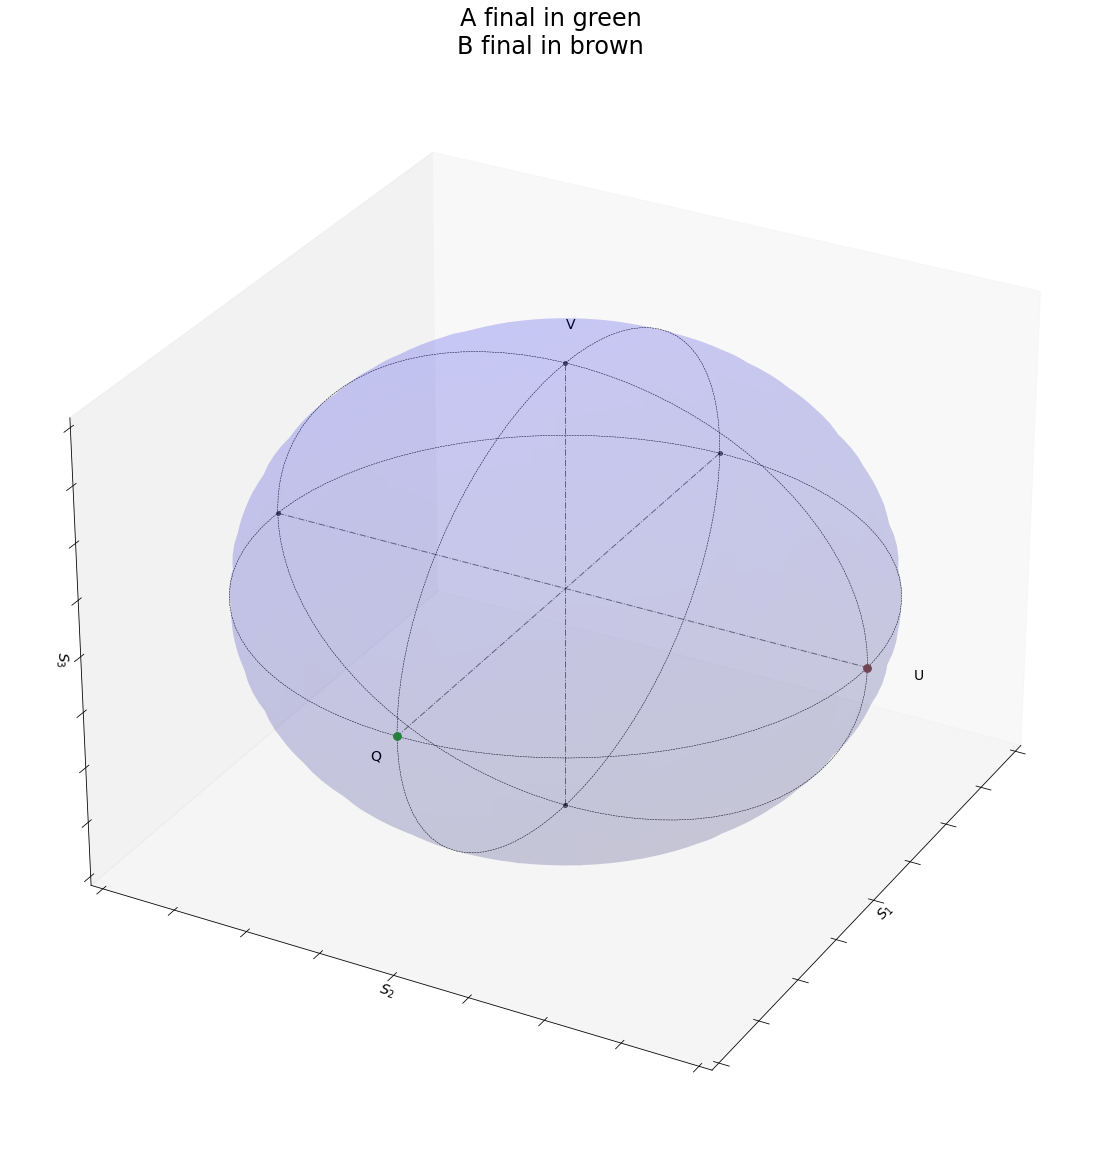

In [5]:
#STEP 2: determine the rotation needed to put B'' into B and apply it to A'' and B''
#        this will give us A_final (same as A'') and B_final

rotation_angle=acos(np.dot(componentsB_primeprime,componentsB))/pi*180



axis=np.cross(componentsB_primeprime,componentsB)
axis=axis/np.linalg.norm(axis)


print(axis)



rotation2=R.from_rotvec(componentsA_primeprime*radians(-1*rotation_angle))


componentsB_final=rotation2.apply(componentsB_primeprime)

# A_final should be the same as A'', so this rotation should have no effect
componentsA_final=rotation2.apply(componentsA_primeprime)


stokesA_final=Stokes("A final")
stokesB_final=Stokes("B final")


stokesA_final.from_components(np.insert(componentsA_final,0,1))
stokesB_final.from_components(np.insert(componentsB_final,0,1))


#Plot A final and B final
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
_=draw_stokes_points(ax,stokesA_final,color_scatter='tab:green')
_=draw_stokes_points(ax,stokesB_final,color_scatter='tab:brown')
_=plt.title("A final in green\nB final in brown",fontsize=24)


In [6]:
#Combine 2 rotations to determine the total rotation
total_rotation=rotation2*rotation1

#Represent it as rotation vector (its axis is the axis of rotation and its length is angle of rotation in radians)
rotvec=total_rotation.as_rotvec()
print("Final rotation: rotate ",np.linalg.norm(rotvec)/pi*180," degrees around vector ",rotvec/np.linalg.norm(rotvec))

Final rotation: rotate  96.08267765897409  degrees around vector  [-0.42939617  0.82851546 -0.35941766]


Axis equal not supported by your current version of Matplotlib


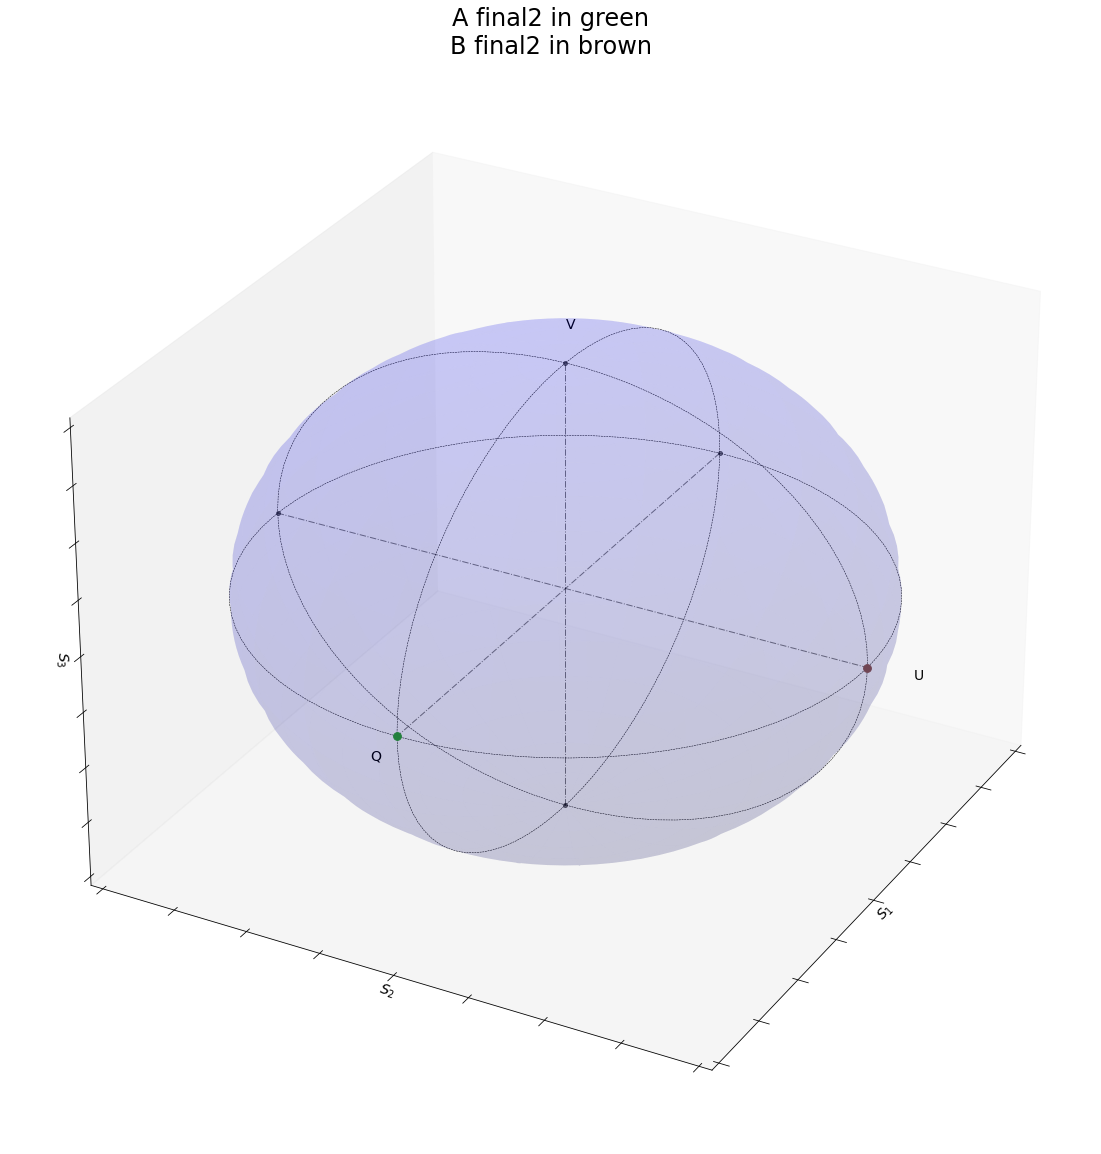

In [7]:
#Now use total rotation to put A' and B' into A and B respectively
#We are now using 1 combined rotation instead of 2 separate rotations, but the effect should be the same 

componentsA_final2=total_rotation.apply(componentsA_prime)
componentsB_final2=total_rotation.apply(componentsB_prime)

stokesA_final2=Stokes("A final2")
stokesB_final2=Stokes("B final2")


stokesA_final2.from_components(np.insert(componentsA_final2,0,1))
stokesB_final2.from_components(np.insert(componentsB_final2,0,1))

#Plot A final2 and B final2
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
_=draw_stokes_points(ax,stokesA_final2,color_scatter='tab:green')
_=draw_stokes_points(ax,stokesB_final2,color_scatter='tab:brown')
_=plt.title("A final2 in green\nB final2 in brown",fontsize=24)


Axis equal not supported by your current version of Matplotlib


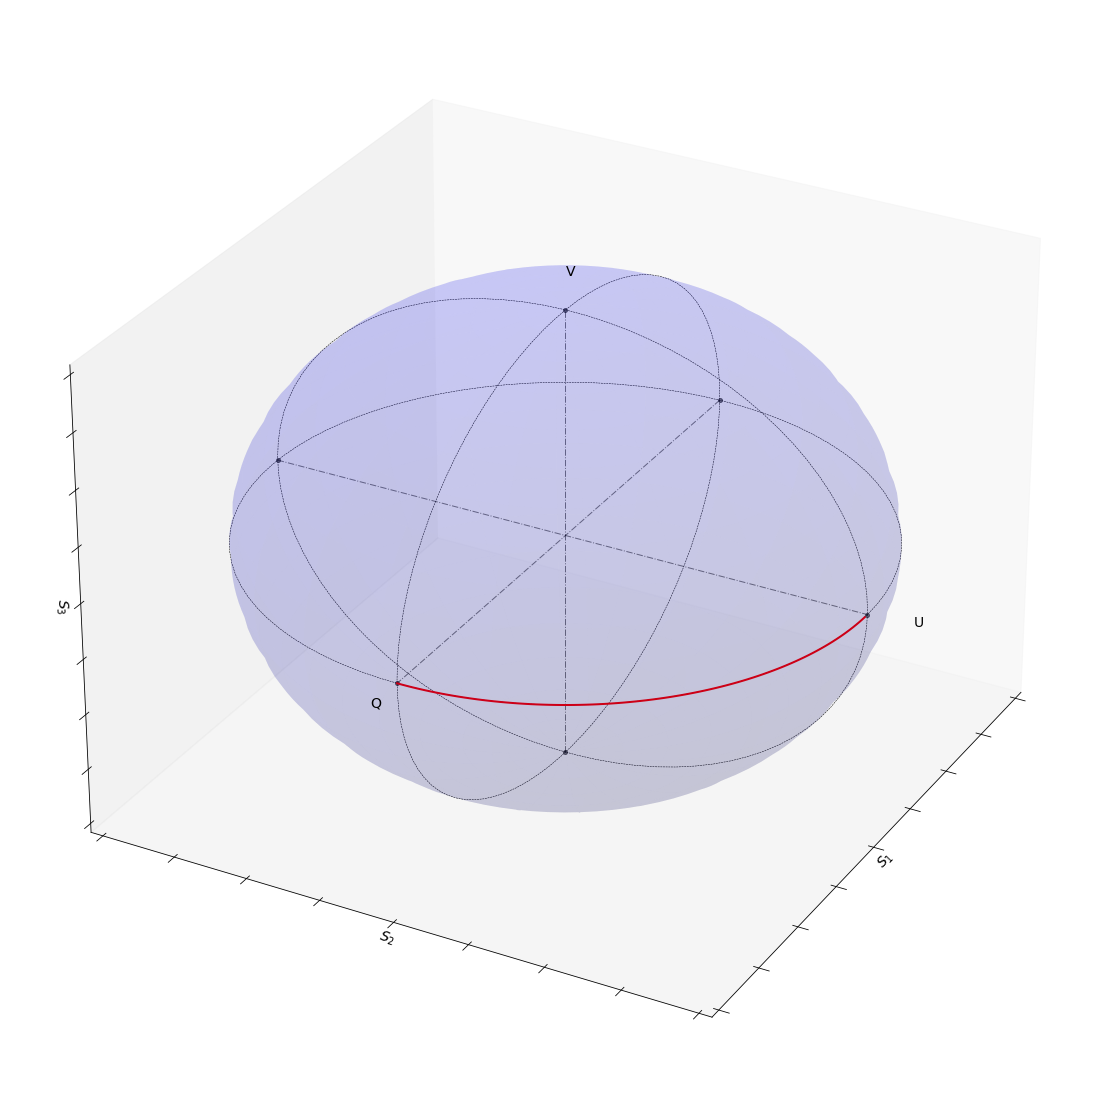

In [8]:
#Line drawing demo


fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])






stokesC=Stokes("C")
stokesC.from_components([1,1,0,0])
componentsC=stokesC.parameters.components()[1:]



stokesD=Stokes("D")
stokesD.from_components([1,0,1,0])
componentsD=stokesD.parameters.components()[1:]


componentsCtoD=componentsC
rotation_angle=acos(np.dot(componentsC,componentsD))/pi*180

axis=np.cross(componentsC,componentsD)
axis=axis/np.linalg.norm(axis)

for current_angle in range(int(rotation_angle)):
    rotation=R.from_rotvec(axis*radians(current_angle))
    componentsCtoD=np.vstack((componentsCtoD,rotation.apply(componentsC)))
    
componentsCtoD=np.hstack((np.ones((componentsCtoD.shape[0],1)),componentsCtoD))

stokesCtoD=Stokes("C to D movement")
stokesCtoD.from_components(componentsCtoD.T)

_=draw_stokes_points(ax,stokesCtoD,color_scatter='tab:brown',kind='line')

Axis equal not supported by your current version of Matplotlib


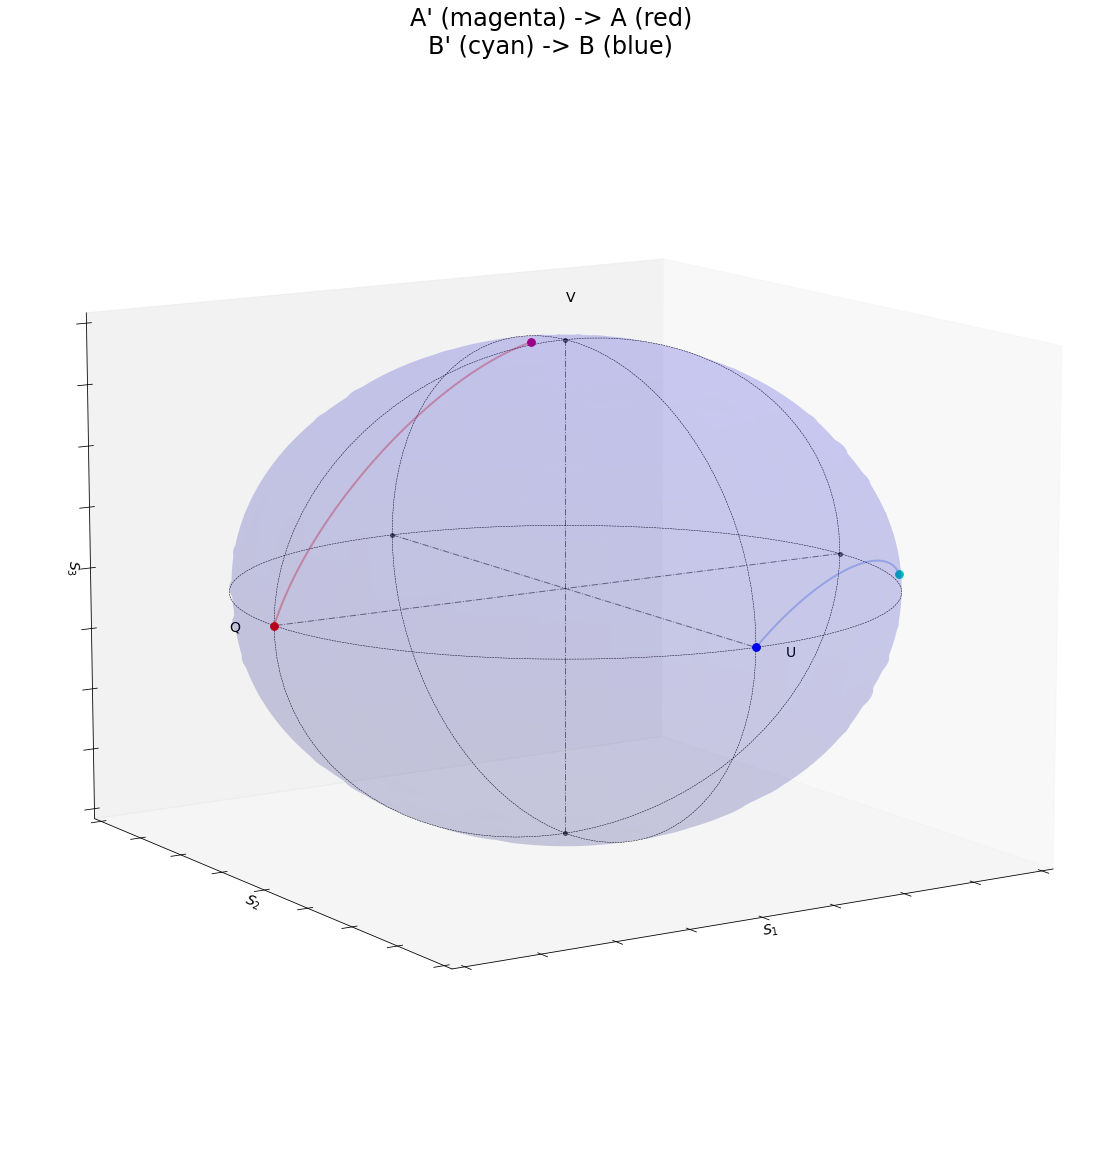

In [9]:
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.2,1])


_=plt.title("A' (magenta) -> A (red)\nB' (cyan) -> B (blue)",fontsize=24)



componentsAprimetoA=componentsA_prime
rotation_angle=np.linalg.norm(rotvec)/pi*180

axis=rotvec/np.linalg.norm(rotvec)

for current_angle in range(int(rotation_angle)):
    rotation=R.from_rotvec(axis*radians(current_angle))
    componentsAprimetoA=np.vstack((componentsAprimetoA,rotation.apply(componentsA_prime)))
    
componentsAprimetoA=np.hstack((np.ones((componentsAprimetoA.shape[0],1)),componentsAprimetoA))

stokesAprimetoA=Stokes("A' to A movement")
stokesAprimetoA.from_components(componentsAprimetoA.T)





componentsBprimetoB=componentsB_prime

for current_angle in range(int(rotation_angle)):
    rotation=R.from_rotvec(axis*radians(current_angle))
    componentsBprimetoB=np.vstack((componentsBprimetoB,rotation.apply(componentsB_prime)))
    
componentsBprimetoB=np.hstack((np.ones((componentsBprimetoB.shape[0],1)),componentsBprimetoB))

stokesBprimetoB=Stokes("B' to B movement")
stokesBprimetoB.from_components(componentsBprimetoB.T)

















_=draw_stokes_points(ax,stokesAprimetoA,kind='line',color_line='#e5000050')
_=draw_stokes_points(ax,stokesA_prime,color_scatter='xkcd:magenta')
_=draw_stokes_points(ax,stokesA,color_scatter='xkcd:red')

_=draw_stokes_points(ax,stokesBprimetoB,kind='line',color_line='#0343df40')
_=draw_stokes_points(ax,stokesB_prime,color_scatter='c')
_=draw_stokes_points(ax,stokesB,color_scatter='b')